# ***0. Data Loading***

In [1]:
import pandas as pd

df = pd.read_csv("UNSWNB15_training_coursework.csv")

df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,1,0.000003,unas,-,INT,2,0,200,0,333333.321500,...,4,4,5,0,0,0,8,11,0,1
1,2,0.885807,tcp,ftp,FIN,52,54,2934,3742,118.535982,...,1,1,3,1,1,0,5,1,0,0
2,3,0.538781,tcp,http,FIN,10,8,818,1076,31.552710,...,2,1,5,0,0,1,2,6,0,0
3,4,0.000008,udp,dns,INT,2,0,114,0,125000.000300,...,27,13,34,0,0,0,27,34,0,1
4,5,0.448734,tcp,ftp,FIN,14,12,1476,822,55.712295,...,1,1,1,0,0,0,1,1,0,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 20000 non-null  int64  
 1   dur                20000 non-null  float64
 2   proto              20000 non-null  object 
 3   service            20000 non-null  object 
 4   state              20000 non-null  object 
 5   spkts              20000 non-null  int64  
 6   dpkts              20000 non-null  int64  
 7   sbytes             20000 non-null  int64  
 8   dbytes             20000 non-null  int64  
 9   rate               20000 non-null  float64
 10  sttl               20000 non-null  int64  
 11  dttl               20000 non-null  int64  
 12  sload              20000 non-null  float64
 13  dload              20000 non-null  float64
 14  sloss              20000 non-null  int64  
 15  dloss              20000 non-null  int64  
 16  sinpkt             200

In [3]:
print(df.describe())

                 id           dur         spkts         dpkts        sbytes  \
count  20000.000000  20000.000000  20000.000000  20000.000000  2.000000e+04   
mean   10000.500000      0.984361     17.665100     16.328650  7.199524e+03   
std     5773.647028      4.623803    127.429883     79.351286  1.638553e+05   
min        1.000000      0.000000      1.000000      0.000000  2.400000e+01   
25%     5000.750000      0.000008      2.000000      0.000000  1.140000e+02   
50%    10000.500000      0.013746      6.000000      2.000000  5.340000e+02   
75%    15000.250000      0.717441     12.000000     10.000000  1.268000e+03   
max    20000.000000     59.995674   9392.000000   3504.000000  1.250037e+07   

             dbytes          rate          sttl          dttl         sload  \
count  2.000000e+04  2.000000e+04  20000.000000  20000.000000  2.000000e+04   
mean   1.181382e+04  8.284978e+04    182.044500     95.980700  6.351236e+07   
std    1.018836e+05  1.489504e+05    101.046988    

# ***1. Data Pre-Processing (Task 1)***

In [4]:
df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
label      

In [5]:
categori_col = []
for i in df.columns:
    if df[i].nunique() < 25:
        categori_col.append(i)
        print(i)

service
state
sttl
dttl
swin
dwin
trans_depth
ct_state_ttl
is_ftp_login
ct_ftp_cmd
ct_flw_http_mthd
is_sm_ips_ports
label


In [6]:
for i in categori_col:
    print(f"Column: {i}")
    print(df[i].value_counts())
    print("=====")

Column: service
service
-           11296
dns          5256
http         2096
smtp          454
ftp           385
ftp-data      324
pop3          103
ssh            57
dhcp           10
ssl            10
snmp            6
radius          2
irc             1
Name: count, dtype: int64
=====
Column: state
state
FIN    9530
INT    8357
CON    1662
REQ     451
Name: count, dtype: int64
=====
Column: sttl
sttl
254    13222
31      3977
62      2531
0        237
29         8
32         7
1          7
255        6
60         5
Name: count, dtype: int64
=====
Column: dttl
dttl
0      8820
252    7147
29     3969
60       44
30       13
31        6
253       1
Name: count, dtype: int64
=====
Column: swin
swin
255    10436
0       9562
67         1
154        1
Name: count, dtype: int64
=====
Column: dwin
dwin
255    10022
0       9976
137        1
77         1
Name: count, dtype: int64
=====
Column: trans_depth
trans_depth
0      18093
1       1899
2          5
8          1
9          1
131     

In [7]:
df["proto"].value_counts()

proto
tcp       10438
udp        7173
unas        896
arp         231
ospf        163
          ...  
igp           3
idrp          3
sdrp          3
tlsp          2
ipcomp        2
Name: count, Length: 131, dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['service', 'state']

def one_hot_encode(df, categorical_cols):
    df_encoded = df.copy()

    for col in categorical_cols:
        dummies = pd.get_dummies(df_encoded[col], prefix=col, drop_first=False)
        df_encoded = pd.concat([df_encoded, dummies], axis=1)
        df_encoded.drop(col, axis=1, inplace=True)
    
    return df_encoded

df_encoded = one_hot_encode(df, categorical_cols)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 20000 non-null  int64  
 1   dur                20000 non-null  float64
 2   proto              20000 non-null  object 
 3   spkts              20000 non-null  int64  
 4   dpkts              20000 non-null  int64  
 5   sbytes             20000 non-null  int64  
 6   dbytes             20000 non-null  int64  
 7   rate               20000 non-null  float64
 8   sttl               20000 non-null  int64  
 9   dttl               20000 non-null  int64  
 10  sload              20000 non-null  float64
 11  dload              20000 non-null  float64
 12  sloss              20000 non-null  int64  
 13  dloss              20000 non-null  int64  
 14  sinpkt             20000 non-null  float64
 15  dinpkt             20000 non-null  float64
 16  sjit               200

In [9]:
import numpy as np
import pandas as pd

# 1. Identify the most common protocols and group the rest
def encode_protocol(df, column='proto', top_n=10):
    # Get value counts
    value_counts = df[column].value_counts()
    
    # Identify top N values
    top_values = value_counts.head(top_n).index.tolist()
    
    # Create a copy of the dataframe
    df_encoded = df.copy()
    
    # Replace all non-top values with 'other'
    df_encoded[column] = df_encoded[column].apply(lambda x: x if x in top_values else 'other')
    
    # One-hot encode the modified column
    proto_encoded = pd.get_dummies(df_encoded[column], prefix=column, drop_first=False)
    
    # Concatenate with original dataframe
    df_encoded = pd.concat([df_encoded, proto_encoded], axis=1)
    
    # Drop the original column
    df_encoded.drop(column, axis=1, inplace=True)
    
    return df_encoded

# Apply the protocol encoding
df_encoded = encode_protocol(df_encoded, top_n=10)

# Check the new dummy columns
proto_columns = [col for col in df_encoded.columns if col.startswith('proto_')]
print(f"Protocol encoded columns: {proto_columns}")
print(f"Shape after encoding proto: {df_encoded.shape}")

Protocol encoded columns: ['proto_any', 'proto_arp', 'proto_gre', 'proto_leaf-1', 'proto_ospf', 'proto_other', 'proto_rsvp', 'proto_sctp', 'proto_tcp', 'proto_udp', 'proto_unas']
Shape after encoding proto: (20000, 69)


In [10]:
def check_feature_correlations(df, target='label'):
    correlations = df.corr()[target].sort_values(ascending=False)
    print("Top positive correlations with target:")
    print(correlations[correlations > 0].head(10))
    print("\nTop negative correlations with target:")
    print(correlations[correlations < 0].head(10))
    
    return correlations

target_correlations = check_feature_correlations(df_encoded)

Top positive correlations with target:
label               1.000000
state_INT           0.539950
sttl                0.501182
ct_dst_sport_ltm    0.391979
service_dns         0.364610
ct_src_dport_ltm    0.340933
rate                0.327217
ct_state_ttl        0.314762
ct_srv_dst          0.298652
ct_srv_src          0.294529
Name: label, dtype: float64

Top negative correlations with target:
service_radius      -0.001143
dur                 -0.002083
trans_depth         -0.009842
service_ftp         -0.017850
response_body_len   -0.019607
is_ftp_login        -0.020437
ct_ftp_cmd          -0.021001
service_http        -0.021706
djit                -0.031771
spkts               -0.033389
Name: label, dtype: float64


In [11]:
df["label"].value_counts()

label
1    11136
0     8864
Name: count, dtype: int64

In [25]:
import numpy as np
import pandas as pd
import math
from collections import defaultdict
import random
import time

def standardize_features(df, exclude_cols=None):
    """
    Standardize features to have zero mean and unit variance
    exclude_cols: list of columns to exclude from standardization (e.g., target variable)
    """
    if exclude_cols is None:
        exclude_cols = []
    
    # Create a copy of the dataframe
    df_std = df.copy()
    
    # Get columns to standardize
    cols_to_standardize = [col for col in df.columns if col not in exclude_cols]
    
    # Calculate mean and std, and standardize
    for col in cols_to_standardize:
        mean = df[col].mean()
        std = df[col].std()
        # Avoid division by zero
        if std > 0:
            df_std[col] = (df[col] - mean) / std
        else:
            df_std[col] = 0  # Set to zero if std is zero
    
    # Store the mean and std for later use (e.g., with test data)
    scaler_params = {col: {'mean': df[col].mean(), 'std': df[col].std()} 
                     for col in cols_to_standardize}
    
    return df_std, scaler_params

In [26]:
def train_validation_split(df, val_ratio=0.2, random_state=87):
    """
    Split the dataset into training and validation sets
    val_ratio: proportion of data to use for validation
    """
    # Set random seed for reproducibility
    np.random.seed(random_state)
    
    # Get indices and shuffle
    indices = np.arange(len(df))
    np.random.shuffle(indices)
    
    # Calculate split point
    val_size = int(val_ratio * len(df))
    
    # Split indices
    val_indices = indices[:val_size]
    train_indices = indices[val_size:]
    
    # Create train and validation dataframes
    train_df = df.iloc[train_indices].reset_index(drop=True)
    val_df = df.iloc[val_indices].reset_index(drop=True)
    
    return train_df, val_df

In [56]:
class RBFN:
    def __init__(self, num_centers, sigma=1.0):
        """
        Initialize RBFN
        num_centers: number of RBF neurons/centers
        sigma: width parameter for RBF neurons
        """
        self.num_centers = num_centers
        self.sigma = sigma
        self.centers = None
        self.weights = None
        self.bias = None
    
    def _kmeans(self, X, max_iters=200, tol=1e-4):
        """
        Implement K-means algorithm for finding centers
        """
        n_samples, n_features = X.shape
        
        # Initialize centers by randomly selecting data points
        random_indices = np.random.choice(n_samples, self.num_centers, replace=False)
        centers = X[random_indices].copy()
        
        # Iteratively update centers
        for iteration in range(max_iters):
            # Assign each point to the nearest center
            distances = np.zeros((n_samples, self.num_centers))
            for i, center in enumerate(centers):
                # Calculate squared Euclidean distance
                diff = X - center
                distances[:, i] = np.sum(diff * diff, axis=1)
            
            # Get cluster assignments
            cluster_assignments = np.argmin(distances, axis=1)
            
            # Store old centers for convergence check
            old_centers = centers.copy()
            
            # Update centers
            for i in range(self.num_centers):
                # Get points assigned to this cluster
                cluster_points = X[cluster_assignments == i]
                if len(cluster_points) > 0:
                    centers[i] = np.mean(cluster_points, axis=0)
            
            # Check for convergence
            center_shift = np.sum((centers - old_centers) ** 2)
            if center_shift < tol:
                break
        
        return centers
    
    def _calculate_sigma(self, centers):
        """
        Calculate sigma based on average distance between centers
        """
        # Calculate pairwise distances between centers
        n_centers = centers.shape[0]
        distances = np.zeros((n_centers, n_centers))
        
        for i in range(n_centers):
            for j in range(i+1, n_centers):
                dist = np.sqrt(np.sum((centers[i] - centers[j]) ** 2))
                distances[i, j] = distances[j, i] = dist
        
        # Average distance to closest center
        min_distances = []
        for i in range(n_centers):
            # Filter out self-distance (which is 0)
            center_distances = [d for j, d in enumerate(distances[i]) if j != i and d > 0]
            if center_distances:
                min_distances.append(min(center_distances))
        
        # If can't calculate, use default value
        if not min_distances:
            return self.sigma
        
        # Set sigma as average minimum distance / sqrt(2*num_centers)
        sigma = np.mean(min_distances) / math.sqrt(2 * self.num_centers)
        return max(sigma, 1e-10)  # Avoid too small sigma
    
    def _rbf(self, x, center):
        """
        Apply Gaussian RBF to a data point
        """
        dist = np.sum((x - center) ** 2)
        return np.exp(-dist / (2 * self.sigma ** 2))
    
    def _calculate_interpolation_matrix(self, X):
        """
        Calculate the interpolation matrix (RBF outputs)
        """
        n_samples = X.shape[0]
        G = np.zeros((n_samples, self.num_centers))
        
        for i in range(n_samples):
            for j in range(self.num_centers):
                G[i, j] = self._rbf(X[i], self.centers[j])
        
        return G
    
    def fit(self, X, y):
        """
        Train the RBFN
        X: input features [n_samples, n_features]
        y: target values [n_samples]
        """
        # Convert to numpy arrays
        X = np.array(X)
        y = np.array(y)
        
        # Find centers using K-means
        print("Finding centers using K-means...")
        self.centers = self._kmeans(X)
        
        # Calculate optimal sigma
        # self.sigma = self._calculate_sigma(self.centers)
        # print(f"Using sigma: {self.sigma}")
        
        # Calculate interpolation matrix
        print("Calculating interpolation matrix...")
        G = self._calculate_interpolation_matrix(X)
        
        # Add a column of ones for bias
        G_with_bias = np.column_stack((G, np.ones(X.shape[0])))
        
        # Solve for weights using pseudoinverse (normal equation)
        print("Solving for weights...")
        try:
            # Using pseudoinverse: (G^T G)^(-1) G^T y
            GTG = np.dot(G_with_bias.T, G_with_bias)
            GTG_inv = np.linalg.inv(GTG + np.eye(GTG.shape[0]) * 1e-6)  # Add small regularization
            self.weights = np.dot(np.dot(GTG_inv, G_with_bias.T), y)
            
            # Extract bias term
            self.bias = self.weights[-1]
            # Keep only RBF weights
            self.weights = self.weights[:-1]
            
            # Calculate training error
            y_pred = self.predict(X)
            accuracy = np.mean(y_pred == y)
            print(f"Training accuracy: {accuracy:.4f}")
            
        except np.linalg.LinAlgError:
            print("Error: Matrix inversion failed. Try reducing the number of centers or adding more regularization.")
            # Set random weights as fallback
            self.weights = np.random.randn(self.num_centers)
            self.bias = 0
    
    def predict(self, X):
        """
        Make predictions using the trained RBFN
        X: input features [n_samples, n_features]
        Returns: predicted classes [n_samples]
        """
        X = np.array(X)
        
        # Calculate RBF outputs
        G = self._calculate_interpolation_matrix(X)
        
        # Apply weights and add bias
        y_pred_raw = np.dot(G, self.weights) + self.bias
        
        # Apply threshold for binary classification
        y_pred = (y_pred_raw > 0.5).astype(int)
        
        return y_pred
    
    def predict_proba(self, X):
        """
        Predict probability estimates
        X: input features [n_samples, n_features]
        Returns: probabilities [n_samples]
        """
        X = np.array(X)
        
        # Calculate RBF outputs
        G = self._calculate_interpolation_matrix(X)
        
        # Apply weights and add bias
        y_pred_raw = np.dot(G, self.weights) + self.bias
        
        # Apply sigmoid to get probabilities
        y_proba = 1 / (1 + np.exp(-y_pred_raw))
        
        return y_proba

In [28]:
def evaluate_model(y_true, y_pred):
    """
    Calculate performance metrics
    """
    # Accuracy
    accuracy = np.mean(y_true == y_pred)
    
    # Confusion matrix elements
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    # Precision, recall, F1
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    # Balanced accuracy
    balanced_acc = ((tp / (tp + fn) if (tp + fn) > 0 else 0) + 
                    (tn / (tn + fp) if (tn + fp) > 0 else 0)) / 2
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'balanced_accuracy': balanced_acc,
        'confusion_matrix': {
            'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn
        }
    }

In [28]:
def evaluate_model(y_true, y_pred):
    """
    Calculate performance metrics
    """
    # Accuracy
    accuracy = np.mean(y_true == y_pred)
    
    # Confusion matrix elements
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    # Precision, recall, F1
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    # Balanced accuracy
    balanced_acc = ((tp / (tp + fn) if (tp + fn) > 0 else 0) + 
                    (tn / (tn + fp) if (tn + fp) > 0 else 0)) / 2
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'balanced_accuracy': balanced_acc,
        'confusion_matrix': {
            'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn
        }
    }

In [28]:
def evaluate_model(y_true, y_pred):
    """
    Calculate performance metrics
    """
    # Accuracy
    accuracy = np.mean(y_true == y_pred)
    
    # Confusion matrix elements
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    # Precision, recall, F1
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    # Balanced accuracy
    balanced_acc = ((tp / (tp + fn) if (tp + fn) > 0 else 0) + 
                    (tn / (tn + fp) if (tn + fp) > 0 else 0)) / 2
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'balanced_accuracy': balanced_acc,
        'confusion_matrix': {
            'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn
        }
    }

In [45]:
def grid_search_rbfn(X_train, y_train, X_val, y_val, param_grid):
    """
    Perform grid search to find optimal hyperparameters for RBFN
    
    Parameters:
    -----------
    X_train, y_train: Training data and labels
    X_val, y_val: Validation data and labels
    param_grid: Dictionary with hyperparameters to search
                Example: {'num_centers': [10, 30, 50], 'sigma': [0.1, 1.0, 5.0]}
    
    Returns:
    --------
    best_params: Dictionary with best parameters
    best_model: Trained model with best parameters
    results: Dictionary with all results for analysis
    """
    print("\nStarting grid search for RBFN hyperparameters...")
    
    # Initialize tracking variables
    best_accuracy = 0.0
    best_params = None
    best_model = None
    results = []
    
    # Get all parameter combinations
    param_combinations = []
    
    # Function to recursively build parameter combinations
    def build_param_combinations(current_combo, param_names, param_values, index):
        if index == len(param_names):
            param_combinations.append(current_combo.copy())
            return
        
        param_name = param_names[index]
        for value in param_values[param_name]:
            current_combo[param_name] = value
            build_param_combinations(current_combo, param_names, param_values, index + 1)
    
    # Build all parameter combinations
    param_names = list(param_grid.keys())
    build_param_combinations({}, param_names, param_grid, 0)
    
    total_combinations = len(param_combinations)
    print(f"Testing {total_combinations} parameter combinations")
    
    # Loop through all parameter combinations
    for i, params in enumerate(param_combinations):
        print(f"\nTesting combination {i+1}/{total_combinations}:")
        print(f"Parameters: {params}")
        
        # Create and train model with current parameters
        try:
            start_time = time.time()
            
            # Initialize model with current parameters
            model = RBFN(num_centers=params['num_centers'], sigma=params.get('sigma', 1.0))
            
            # Train the model
            model.fit(X_train, y_train)
            
            # Evaluate on validation set
            y_val_pred = model.predict(X_val)
            val_metrics = evaluate_model(y_val, y_val_pred)
            accuracy = val_metrics['accuracy']
            
            # Record results
            train_time = time.time() - start_time
            result = {
                'params': params.copy(),
                'accuracy': accuracy,
                'precision': val_metrics['precision'],
                'recall': val_metrics['recall'],
                'f1_score': val_metrics['f1_score'],
                'balanced_accuracy': val_metrics['balanced_accuracy'],
                'training_time': train_time
            }
            results.append(result)
            
            print(f"Accuracy: {accuracy:.4f}, Training time: {train_time:.2f}s")
            
            # Update best if improved
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = params.copy()
                best_model = model
                print(f"New best model found! Accuracy: {best_accuracy:.4f}")
                
        except Exception as e:
            print(f"Error with parameters {params}: {str(e)}")
            results.append({
                'params': params.copy(),
                'error': str(e)
            })
    
    # Sort results by accuracy
    valid_results = [r for r in results if 'accuracy' in r]
    sorted_results = sorted(valid_results, key=lambda x: x['accuracy'], reverse=True)
    
    print("\nGrid Search Results:")
    print(f"Best parameters: {best_params}")
    print(f"Best validation accuracy: {best_accuracy:.4f}")
    
    print("\nTop 5 parameter combinations:")
    for i, result in enumerate(sorted_results[:5]):
        print(f"{i+1}. {result['params']} - Accuracy: {result['accuracy']:.4f}")
    
    return best_params, best_model, results

In [60]:
def test_best_model(best_model, best_params, model_params, X_cols):
    """
    Test the best model from grid search on the test set 1
    
    Parameters:
    -----------
    best_model: Trained RBFN model with best parameters
    best_params: Dictionary of best parameters
    model_params: Dictionary with scaler parameters
    X_cols: List of feature columns used for training
    
    Returns:
    --------
    test_metrics: Dictionary with test metrics
    """
    print("\nTesting best model on test set 1...")
    print(f"Best parameters: {best_params}")
    
    try:
        # Load test data
        test_data = pd.read_csv('UNSWNB15_testing1_coursework.csv')
        print(f"Loaded test set with {test_data.shape[0]} samples")
        
        # Perform one-hot encoding for categorical variables
        categorical_cols = ['service', 'state']
        test_encoded = one_hot_encode(test_data, categorical_cols)
        
        # Encode protocol column
        test_encoded = encode_protocol(test_encoded, column='proto', top_n=10)
        
        # Handle missing columns from training data
        for col in X_cols:
            if col not in test_encoded.columns and col != 'label':
                print(f"Adding missing column: {col}")
                test_encoded[col] = 0
        
        # Handle extra columns in test data
        extra_cols = [col for col in test_encoded.columns if col not in X_cols and col != 'label']
        if extra_cols:
            print(f"Dropping extra columns: {extra_cols}")
            test_encoded.drop(columns=extra_cols, inplace=True)
        
        # Ensure all X_cols are present
        missing_cols = [col for col in X_cols if col not in test_encoded.columns]
        if missing_cols:
            raise ValueError(f"Missing columns in test data: {missing_cols}")
        
        # Standardize features using training parameters
        test_std = pd.DataFrame()
        scaler_params = model_params['scaler_params']
        
        for col in X_cols:
            if col in scaler_params:
                mean = scaler_params[col]['mean']
                std = scaler_params[col]['std']
                if std > 0:
                    test_std[col] = (test_encoded[col] - mean) / std
                else:
                    test_std[col] = 0
            else:
                test_std[col] = test_encoded[col]
        
        # Extract features and target
        X_test = test_std[X_cols].values
        y_test = test_data['label'].values
        
        # Make predictions
        y_pred = best_model.predict(X_test)
        
        # Evaluate
        test_metrics = evaluate_model(y_test, y_pred)
        
        # Print results
        print("\nTest Set Results:")
        print(f"Accuracy: {test_metrics['accuracy']:.4f}")
        print(f"Precision: {test_metrics['precision']:.4f}")
        print(f"Recall: {test_metrics['recall']:.4f}")
        print(f"F1 Score: {test_metrics['f1_score']:.4f}")
        print(f"Balanced Accuracy: {test_metrics['balanced_accuracy']:.4f}")
        print("Confusion Matrix:")
        print(f"TP: {test_metrics['confusion_matrix']['tp']}, TN: {test_metrics['confusion_matrix']['tn']}")
        print(f"FP: {test_metrics['confusion_matrix']['fp']}, FN: {test_metrics['confusion_matrix']['fn']}")
        
        # Calculate threshold requirements
        required_accuracy = 0.85
        achieved = test_metrics['accuracy'] >= required_accuracy
        print(f"\nRequired accuracy: {required_accuracy:.2f}")
        print(f"Achieved accuracy: {test_metrics['accuracy']:.4f}")
        print(f"Requirement met: {achieved}")
        
        # Bonus: Try to find optimal threshold for classification
        if hasattr(best_model, 'predict_proba'):
            print("\nOptimizing decision threshold...")
            probs = best_model.predict_proba(X_test)
            
            # Test different thresholds
            thresholds = np.linspace(0.1, 0.9, 9)
            threshold_results = []
            
            for threshold in thresholds:
                y_pred_threshold = (probs > threshold).astype(int)
                metrics = evaluate_model(y_test, y_pred_threshold)
                threshold_results.append({
                    'threshold': threshold,
                    'accuracy': metrics['accuracy'],
                    'balanced_accuracy': metrics['balanced_accuracy'],
                    'f1_score': metrics['f1_score']
                })
            
            # Find best threshold
            best_threshold = max(threshold_results, key=lambda x: x['accuracy'])
            print(f"Best threshold: {best_threshold['threshold']:.2f} with accuracy: {best_threshold['accuracy']:.4f}")
            
            # Apply best threshold
            y_pred_best = (probs > best_threshold['threshold']).astype(int)
            optimized_metrics = evaluate_model(y_test, y_pred_best)
            
            print("\nResults with optimized threshold:")
            print(f"Accuracy: {optimized_metrics['accuracy']:.4f}")
            print(f"Precision: {optimized_metrics['precision']:.4f}")
            print(f"Recall: {optimized_metrics['recall']:.4f}")
            print(f"F1 Score: {optimized_metrics['f1_score']:.4f}")
            print(f"Balanced Accuracy: {optimized_metrics['balanced_accuracy']:.4f}")
        
        return test_metrics
        
    except Exception as e:
        print(f"Error testing model: {str(e)}")
        import traceback
        traceback.print_exc()
        return None


In [61]:
def predict_test_set2(best_model, model_params, X_cols):
    """
    Generate predictions for test set 2 (no labels)
    """
    print("\nPredicting on test set 2...")
    
    try:
        # Load test data
        test_data = pd.read_csv('UNSWNB15_testing2_coursework_no_label.csv')
        print(f"Loaded test set 2 with {test_data.shape[0]} samples")
        
        # Perform one-hot encoding for categorical variables
        categorical_cols = ['service', 'state']
        test_encoded = one_hot_encode(test_data, categorical_cols)
        
        # Encode protocol column
        test_encoded = encode_protocol(test_encoded, column='proto', top_n=10)
        
        # Handle missing and extra columns
        for col in X_cols:
            if col not in test_encoded.columns:
                print(f"Adding missing column: {col}")
                test_encoded[col] = 0
                
        # Keep only the necessary columns
        test_columns = [col for col in test_encoded.columns if col in X_cols]
        test_encoded = test_encoded[test_columns]
        
        # Check if all features are present
        missing_cols = [col for col in X_cols if col not in test_encoded.columns]
        if missing_cols:
            raise ValueError(f"Missing columns in test data: {missing_cols}")
        
        # Standardize features
        test_std = pd.DataFrame()
        scaler_params = model_params['scaler_params']
        
        for col in X_cols:
            if col in scaler_params:
                mean = scaler_params[col]['mean']
                std = scaler_params[col]['std']
                if std > 0:
                    test_std[col] = (test_encoded[col] - mean) / std
                else:
                    test_std[col] = 0
            else:
                test_std[col] = test_encoded[col]
        
        # Extract features
        X_test = test_std[X_cols].values
        
        # Make predictions
        y_pred = best_model.predict(X_test)
        
        # Print predictions
        print("\nPredictions for test set 2:")
        print(y_pred)
        
        # Create results dataframe
        results_df = pd.DataFrame({
            'Index': range(len(y_pred)),
            'Predicted_Label': y_pred
        })
        
        # Save to CSV
        results_path = 'test_set2_predictions.csv'
        results_df.to_csv(results_path, index=False)
        print(f"Saved predictions to {results_path}")
        
        return y_pred
        
    except Exception as e:
        print(f"Error predicting on test set 2: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

In [65]:
def main(center):
    # Load training data (adjust path as needed)
    print("Loading training data...")
    train_data = df_encoded.copy()

    print("\nPerforming feature selection based on correlations...")
    # Select features with absolute correlation above a threshold
    correlation_threshold = 0.1  # Adjust this threshold as needed
    important_features = target_correlations.abs().sort_values(ascending=False)
    selected_features = important_features[important_features > correlation_threshold].index.tolist()
    
    # Remove 'label' from selected features if present
    if 'label' in selected_features:
        selected_features.remove('label')
    
    print(f"Selected {len(selected_features)} features with correlation > {correlation_threshold}")
    print("Top selected features:")
    print(selected_features[:10])  # Print top 10 features
    
    # Update X_cols to only use selected features
    X_cols = selected_features

    
    # And 'label' is the target column
    # X_cols = [col for col in train_data.columns if col != 'label']
    y_col = 'label'
    
    # Standardize features
    print("Standardizing features...")
    train_data_std, scaler_params = standardize_features(train_data, exclude_cols=[y_col])
    
    # Split into train and validation
    print("Splitting data...")
    train_df, val_df = train_validation_split(train_data_std, val_ratio=0.2)
    
    # Prepare data
    X_train = train_df[X_cols].values
    y_train = train_df[y_col].values
    X_val = val_df[X_cols].values
    y_val = val_df[y_col].values
    
    print(f"Training set: {X_train.shape[0]} samples, {X_train.shape[1]} features")
    print(f"Validation set: {X_val.shape[0]} samples, {X_val.shape[1]} features")
    
    # # Define parameter grid for search
    # param_grid = {
    #     'num_centers': [30, 50, 70, 100],
    #     'sigma': [0.1, 0.5, 1.0, 2.0, 5.0]
    # }
    
    # Define parameter grid for search
    param_grid = {
        'num_centers': [70, 100, 120,140],
        'sigma': [2.0, 5.0, 7.0, 8.0, 9.0]
    }
    
    
    # Perform grid search
    best_params, best_model, grid_results = grid_search_rbfn(X_train, y_train, X_val, y_val, param_grid)
    
    # Use the best model for final evaluation
    rbfn = best_model
    
    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Validation set: {X_val.shape[0]} samples")
    
    # # Train RBFN model
    # print("Training RBFN model...")
    # start_time = time.time()
    # rbfn = RBFN(num_centers=center, sigma=1.0)  # Adjust num_centers as needed
    # rbfn.fit(X_train, y_train)
    # training_time = time.time() - start_time
    # print(f"Training completed in {training_time:.2f} seconds")
    
    # Evaluate on validation set
    print("Evaluating on validation set...")
    y_val_pred = rbfn.predict(X_val)
    val_metrics = evaluate_model(y_val, y_val_pred)
    
    print("\nValidation Results:")
    print(f"Accuracy: {val_metrics['accuracy']:.4f}")
    print(f"Precision: {val_metrics['precision']:.4f}")
    print(f"Recall: {val_metrics['recall']:.4f}")
    print(f"F1 Score: {val_metrics['f1_score']:.4f}")
    print(f"Balanced Accuracy: {val_metrics['balanced_accuracy']:.4f}")
    print("Confusion Matrix:")
    print(f"TP: {val_metrics['confusion_matrix']['tp']}, TN: {val_metrics['confusion_matrix']['tn']}")
    print(f"FP: {val_metrics['confusion_matrix']['fp']}, FN: {val_metrics['confusion_matrix']['fn']}")
    
    # Save the model parameters (centers, weights, sigma) for later use
    model_params = {
        'centers': rbfn.centers,
        'weights': rbfn.weights,
        'bias': rbfn.bias,
        'sigma': rbfn.sigma,
        'scaler_params': scaler_params
    }

    test_metrics = test_best_model(best_model, best_params, model_params, X_cols)
    test2_predictions = predict_test_set2(best_model, model_params, X_cols)
    
    return rbfn, model_params, val_metrics, test_metrics, test2_predictions

In [66]:
rbfn, model_params, val_metrics, test_metrics, test2_predictions = main(40)

Loading training data...

Performing feature selection based on correlations...
Selected 34 features with correlation > 0.1
Top selected features:
['state_INT', 'sttl', 'proto_tcp', 'swin', 'ct_dst_sport_ltm', 'dwin', 'service_dns', 'ct_src_dport_ltm', 'rate', 'state_FIN']
Standardizing features...
Splitting data...
Training set: 16000 samples, 34 features
Validation set: 4000 samples, 34 features

Starting grid search for RBFN hyperparameters...
Testing 20 parameter combinations

Testing combination 1/20:
Parameters: {'num_centers': 70, 'sigma': 2.0}
Finding centers using K-means...
Calculating interpolation matrix...
Solving for weights...
Training accuracy: 0.8647
Accuracy: 0.8702, Training time: 31.10s
New best model found! Accuracy: 0.8702

Testing combination 2/20:
Parameters: {'num_centers': 70, 'sigma': 5.0}
Finding centers using K-means...
Calculating interpolation matrix...
Solving for weights...
Training accuracy: 0.8875
Accuracy: 0.8958, Training time: 25.81s
New best model

In [63]:
# rbfn, model_params, val_metrics, test_metrics, test2_predictions = main(40)

Loading training data...
Original data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 20000 non-null  int64  
 1   dur                20000 non-null  float64
 2   proto              20000 non-null  object 
 3   service            20000 non-null  object 
 4   state              20000 non-null  object 
 5   spkts              20000 non-null  int64  
 6   dpkts              20000 non-null  int64  
 7   sbytes             20000 non-null  int64  
 8   dbytes             20000 non-null  int64  
 9   rate               20000 non-null  float64
 10  sttl               20000 non-null  int64  
 11  dttl               20000 non-null  int64  
 12  sload              20000 non-null  float64
 13  dload              20000 non-null  float64
 14  sloss              20000 non-null  int64  
 15  dloss              20000 

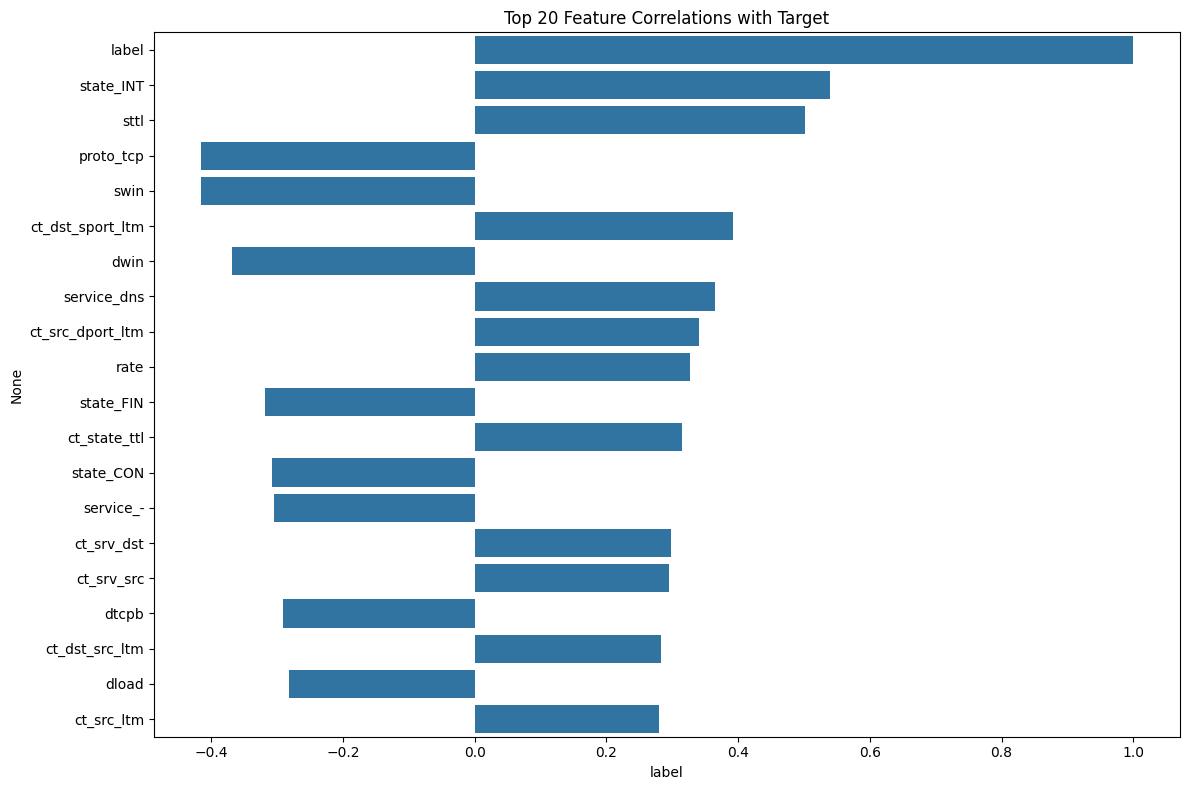

In [50]:
import numpy as np
import pandas as pd
import math
from collections import defaultdict
import random
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Encoding functions
def one_hot_encode(df, categorical_cols):
    """
    One-hot encode categorical columns
    """
    df_encoded = df.copy()
    for col in categorical_cols:
        if col in df_encoded.columns:
            dummies = pd.get_dummies(df_encoded[col], prefix=col, drop_first=False)
            df_encoded = pd.concat([df_encoded, dummies], axis=1)
            df_encoded.drop(col, axis=1, inplace=True)
    
    return df_encoded

def encode_protocol(df, column='proto', top_n=10):
    """
    Encode protocol column by keeping top N values and grouping others
    """
    if column not in df.columns:
        return df
        
    # Get value counts
    value_counts = df[column].value_counts()
    
    # Identify top N values
    top_values = value_counts.head(top_n).index.tolist()
    
    # Create a copy of the dataframe
    df_encoded = df.copy()
    
    # Replace all non-top values with 'other'
    df_encoded[column] = df_encoded[column].apply(lambda x: x if x in top_values else 'other')
    
    # One-hot encode the modified column
    proto_encoded = pd.get_dummies(df_encoded[column], prefix=column, drop_first=False)
    
    # Concatenate with original dataframe
    df_encoded = pd.concat([df_encoded, proto_encoded], axis=1)
    
    # Drop the original column
    df_encoded.drop(column, axis=1, inplace=True)
    
    return df_encoded

# [Keep all the other functions from the previous code here: standardize_features, train_validation_split, RBFN class, evaluate_model]

# 5. Main execution
def main():
    # Load training data
    print("Loading training data...")
    train_data = pd.read_csv('UNSWNB15_training_coursework.csv')
    
    # Display basic information
    print("Original data info:")
    train_data.info()
    
    # Encode categorical columns
    print("\nPerforming one-hot encoding for categorical variables...")
    categorical_cols = ['service', 'state']
    train_data_encoded = one_hot_encode(train_data, categorical_cols)
    
    # Encode protocol column
    print("\nEncoding protocol column...")
    train_data_encoded = encode_protocol(train_data_encoded, column='proto', top_n=10)
    
    # Display encoded data info
    print("\nEncoded data info:")
    train_data_encoded.info()
    
    # Check protocol columns
    proto_columns = [col for col in train_data_encoded.columns if col.startswith('proto_')]
    print(f"Protocol encoded columns: {proto_columns}")
    print(f"Shape after encoding: {train_data_encoded.shape}")
    
    # Check correlation with target (optional)
    print("\nChecking correlations with target variable...")
    correlations = train_data_encoded.corr()['label'].sort_values(ascending=False)
    print("Top positive correlations:")
    print(correlations[correlations > 0].head(10))
    print("\nTop negative correlations:")
    print(correlations[correlations < 0].head(10))
    
    # Visualize top correlations (optional)
    plt.figure(figsize=(12, 8))
    top_features = correlations.abs().sort_values(ascending=False).head(20).index
    sns.barplot(x=correlations[top_features], y=top_features)
    plt.title('Top 20 Feature Correlations with Target')
    plt.tight_layout()
    plt.savefig('correlations.png')  # Save for later reference
    
    # Prepare for RBFN
    X_cols = [col for col in train_data_encoded.columns if col != 'label']
    y_col = 'label'
    
    # Standardize features
    print("\nStandardizing features...")
    train_data_std, scaler_params = standardize_features(train_data_encoded, exclude_cols=[y_col])
    
    # Split into train and validation
    print("Splitting data...")
    train_df, val_df = train_validation_split(train_data_std, val_ratio=0.2)
    
    # Prepare data
    X_train = train_df[X_cols].values
    y_train = train_df[y_col].values
    X_val = val_df[X_cols].values
    y_val = val_df[y_col].values
    
    print(f"Training set: {X_train.shape[0]} samples, {X_train.shape[1]} features")
    print(f"Validation set: {X_val.shape[0]} samples, {X_val.shape[1]} features")
    
    # Train RBFN model
    print("\nTraining RBFN model...")
    start_time = time.time()
    # Start with fewer centers to speed up initial testing
    rbfn = RBFN(num_centers=40, sigma=1.0)  # Adjust num_centers as needed
    rbfn.fit(X_train, y_train)
    training_time = time.time() - start_time
    print(f"Training completed in {training_time:.2f} seconds")
    
    # Evaluate on validation set
    print("\nEvaluating on validation set...")
    y_val_pred = rbfn.predict(X_val)
    val_metrics = evaluate_model(y_val, y_val_pred)
    
    print("\nValidation Results:")
    print(f"Accuracy: {val_metrics['accuracy']:.4f}")
    print(f"Precision: {val_metrics['precision']:.4f}")
    print(f"Recall: {val_metrics['recall']:.4f}")
    print(f"F1 Score: {val_metrics['f1_score']:.4f}")
    print(f"Balanced Accuracy: {val_metrics['balanced_accuracy']:.4f}")
    print("Confusion Matrix:")
    print(f"TP: {val_metrics['confusion_matrix']['tp']}, TN: {val_metrics['confusion_matrix']['tn']}")
    print(f"FP: {val_metrics['confusion_matrix']['fp']}, FN: {val_metrics['confusion_matrix']['fn']}")
    
    # Test on test set 1 if available
    try:
        print("\nLoading and evaluating on test set 1...")
        test_data1 = pd.read_csv('UNSWNB15_testing1_coursework.csv')
        
        # Apply the same preprocessing
        test_data1_encoded = one_hot_encode(test_data1, categorical_cols)
        test_data1_encoded = encode_protocol(test_data1_encoded, column='proto', top_n=10)
        
        # Handle missing columns (if any)
        for col in X_cols:
            if col not in test_data1_encoded.columns and col != 'label':
                test_data1_encoded[col] = 0  # Add missing columns with zeros
        
        # Ensure same column order as training data
        test_data1_encoded = test_data1_encoded[X_cols + ['label']]
        
        # Standardize using training parameters
        test_data1_std = pd.DataFrame()
        for col in X_cols:
            if col in scaler_params:
                mean = scaler_params[col]['mean']
                std = scaler_params[col]['std']
                if std > 0:
                    test_data1_std[col] = (test_data1_encoded[col] - mean) / std
                else:
                    test_data1_std[col] = 0
            else:
                test_data1_std[col] = test_data1_encoded[col]
        
        test_data1_std['label'] = test_data1_encoded['label']
        
        # Evaluate
        X_test1 = test_data1_std[X_cols].values
        y_test1 = test_data1_std['label'].values
        y_test1_pred = rbfn.predict(X_test1)
        
        test1_metrics = evaluate_model(y_test1, y_test1_pred)
        
        print("\nTest Set 1 Results:")
        print(f"Accuracy: {test1_metrics['accuracy']:.4f}")
        print(f"Precision: {test1_metrics['precision']:.4f}")
        print(f"Recall: {test1_metrics['recall']:.4f}")
        print(f"F1 Score: {test1_metrics['f1_score']:.4f}")
        print(f"Balanced Accuracy: {test1_metrics['balanced_accuracy']:.4f}")
        
    except Exception as e:
        print(f"Error evaluating test set 1: {e}")
    
    # Save the model parameters for later use
    model_params = {
        'centers': rbfn.centers,
        'weights': rbfn.weights,
        'bias': rbfn.bias,
        'sigma': rbfn.sigma,
        'scaler_params': scaler_params,
        'X_cols': X_cols  # Save column names for consistent preprocessing
    }
    
    return rbfn, model_params, val_metrics

if __name__ == "__main__":
    rbfn_model, model_params, validation_metrics = main()